<a href="https://colab.research.google.com/github/Sharaffin/Credit-card-default-prediction/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats
from sklearn import preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/ALMABETTER/ML 2nd proj/default of credit card clients.csv"
df = pd.read_csv(path)

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.columns = df.iloc[0,:]

In [ ]:
df = df.iloc[1:,1:]

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
0,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000,20000,...,140000,210000,10000,100000,80000,220000,150000,30000,80000,50000
SEX,2,2,2,2,1,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,1
EDUCATION,2,2,2,2,2,1,1,2,3,3,...,2,2,3,1,2,3,3,2,3,2
MARRIAGE,1,2,2,1,1,2,2,2,1,2,...,1,1,1,2,2,1,2,2,1,1
AGE,24,26,34,37,57,37,29,23,28,35,...,41,34,43,38,34,39,43,37,41,46
PAY_0,2,-1,0,0,-1,0,0,0,0,-2,...,0,3,0,0,2,0,-1,4,1,0
PAY_2,2,2,0,0,0,0,0,-1,0,-2,...,0,2,0,-1,2,0,-1,3,-1,0
PAY_3,-1,0,0,0,-1,0,0,-1,2,-2,...,0,2,0,-1,2,0,-1,2,0,0
PAY_4,-1,0,0,0,0,0,0,0,0,-2,...,0,2,-2,0,2,0,-1,-1,0,0


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
df.shape

(30000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [ ]:
df.isna().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
for i in df.columns:
  df[i] = pd.to_numeric(df[i]) 

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
df.MARRIAGE.replace(0,3 , inplace = True)

In [ ]:
df.MARRIAGE.unique()

array([1, 2, 3])

In [ ]:
cateogical_data = []
for i in df.columns:
  if len(df[i].unique()) <= 15:
    cateogical_data.append(i)


In [ ]:
numerical_data = []
for i in df.columns:
  if len(df[i].unique()) > 15:
    numerical_data.append(i)

In [ ]:
cateogical_data

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default payment next month']

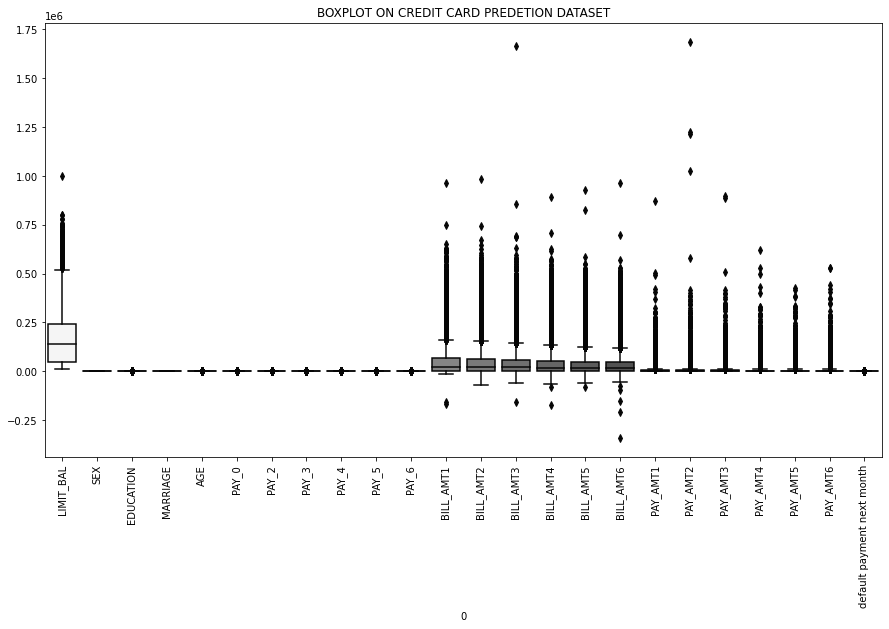

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = df, palette="gist_gray_r")
plt.xticks(rotation = "vertical")
plt.title("BOXPLOT ON CREDIT CARD PREDETION DATASET")
plt.show()

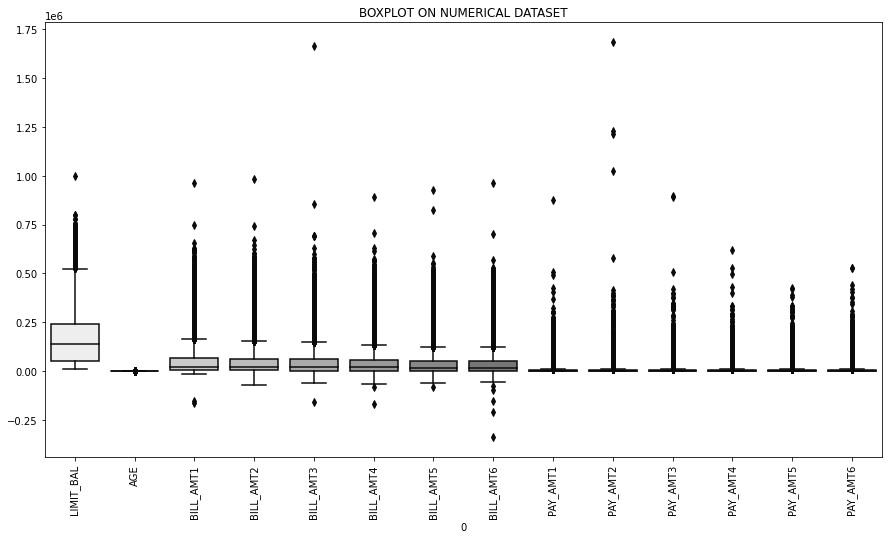

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = df[numerical_data], palette="gist_gray_r")
plt.xticks(rotation = "vertical")
plt.title("BOXPLOT ON NUMERICAL DATASET")
plt.show()

In [ ]:
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace = True)

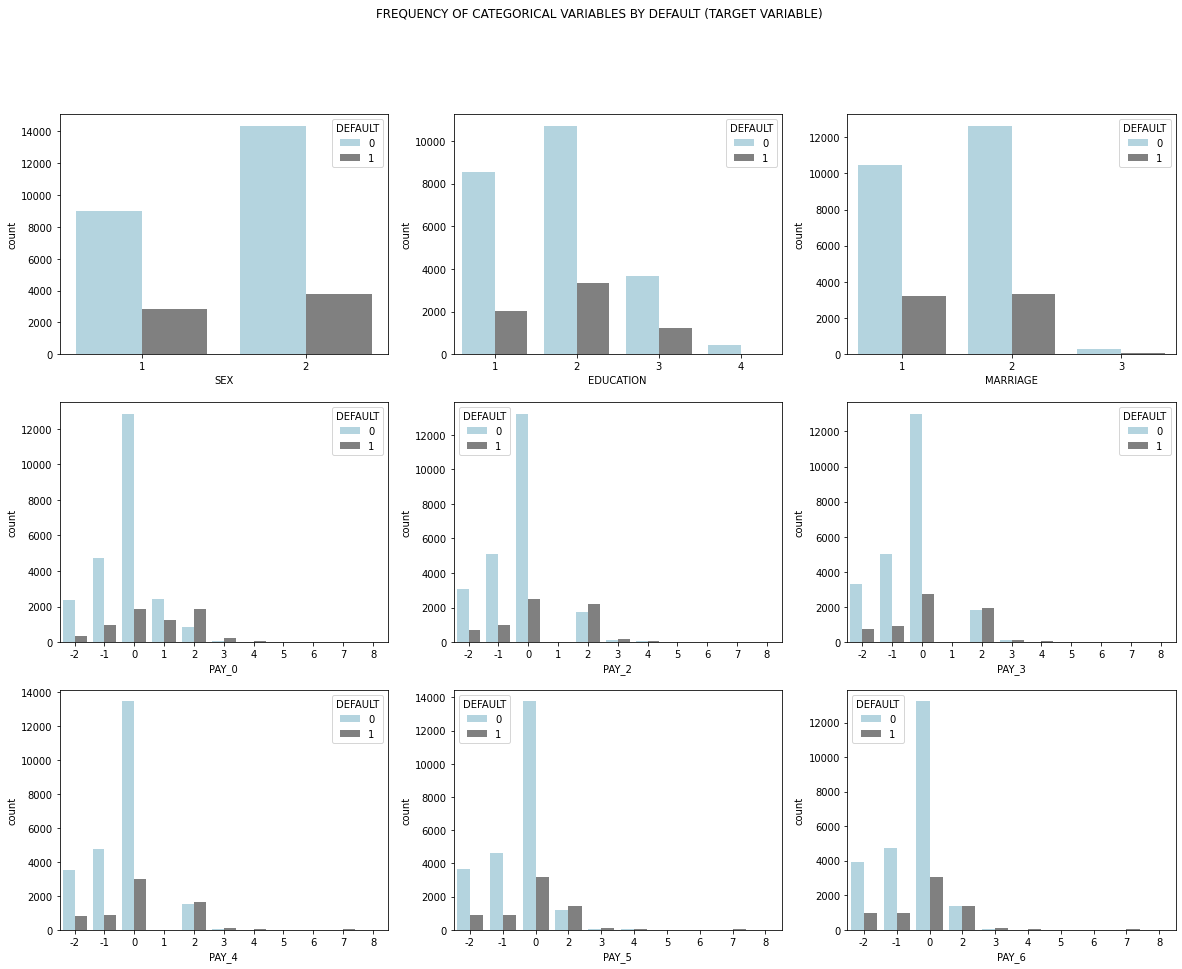

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
fig.suptitle('FREQUENCY OF CATEGORICAL VARIABLES BY DEFAULT (TARGET VARIABLE)')
col="gist_gray"
sns.countplot(x = df[cateogical_data[0]], data = df, hue = df["DEFAULT"], ax=axes[0,0], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[1]], data = df, hue = df["DEFAULT"], ax=axes[0,1], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[2]], data = df, hue = df["DEFAULT"], ax=axes[0,2], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[3]], data = df, hue = df["DEFAULT"], ax=axes[1,0], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[4]], data = df, hue = df["DEFAULT"], ax=axes[1,1], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[5]], data = df, hue = df["DEFAULT"], ax=axes[1,2], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[6]], data = df, hue = df["DEFAULT"], ax=axes[2,0], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[7]], data = df, hue = df["DEFAULT"], ax=axes[2,1], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[8]], data = df, hue = df["DEFAULT"], ax=axes[2,2], palette = ["lightblue", "grey"])
plt.show()

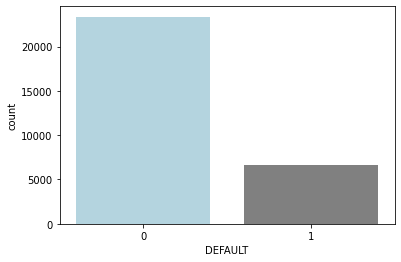

In [ ]:
sns.countplot(x = "DEFAULT" , data = df, palette = ["lightblue", "grey"])
plt.show()

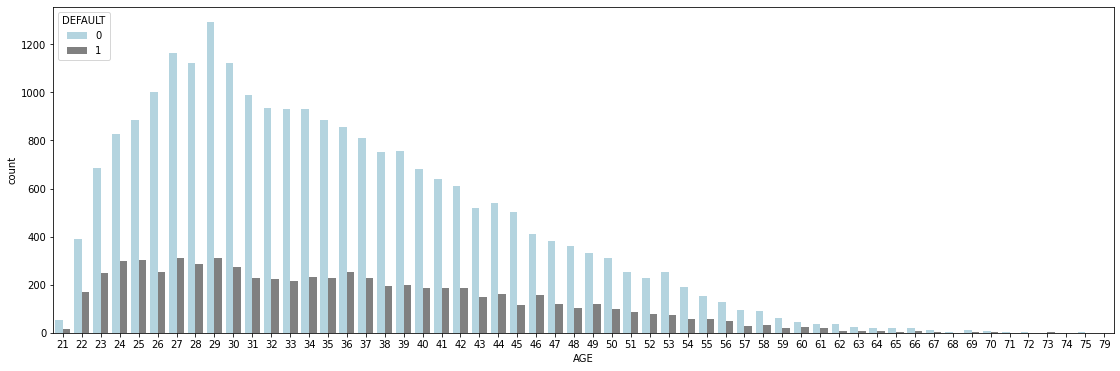

In [ ]:
plt.figure(figsize = (19,6))
sns.countplot(x = "AGE" , data = df, palette = ["lightblue", "grey"], hue = "DEFAULT")
plt.show()

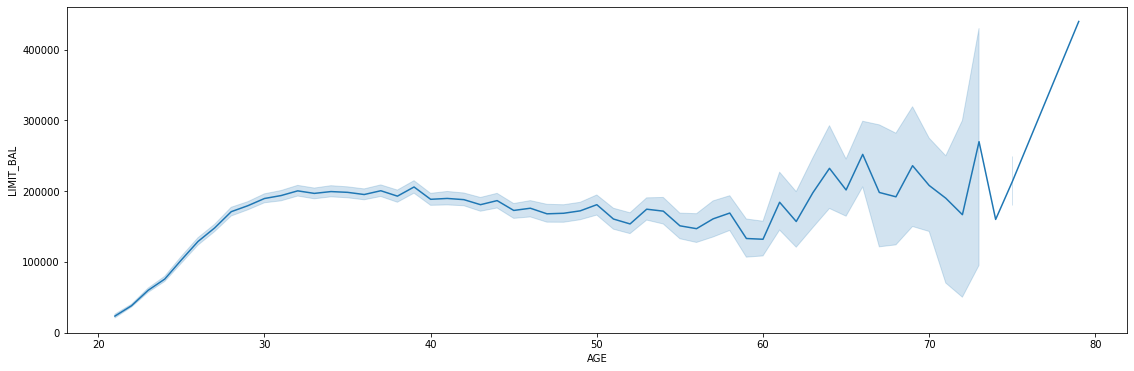

In [ ]:
plt.figure(figsize = (19,6))
sns.lineplot(data= df, x="AGE", y="LIMIT_BAL")
plt.show()

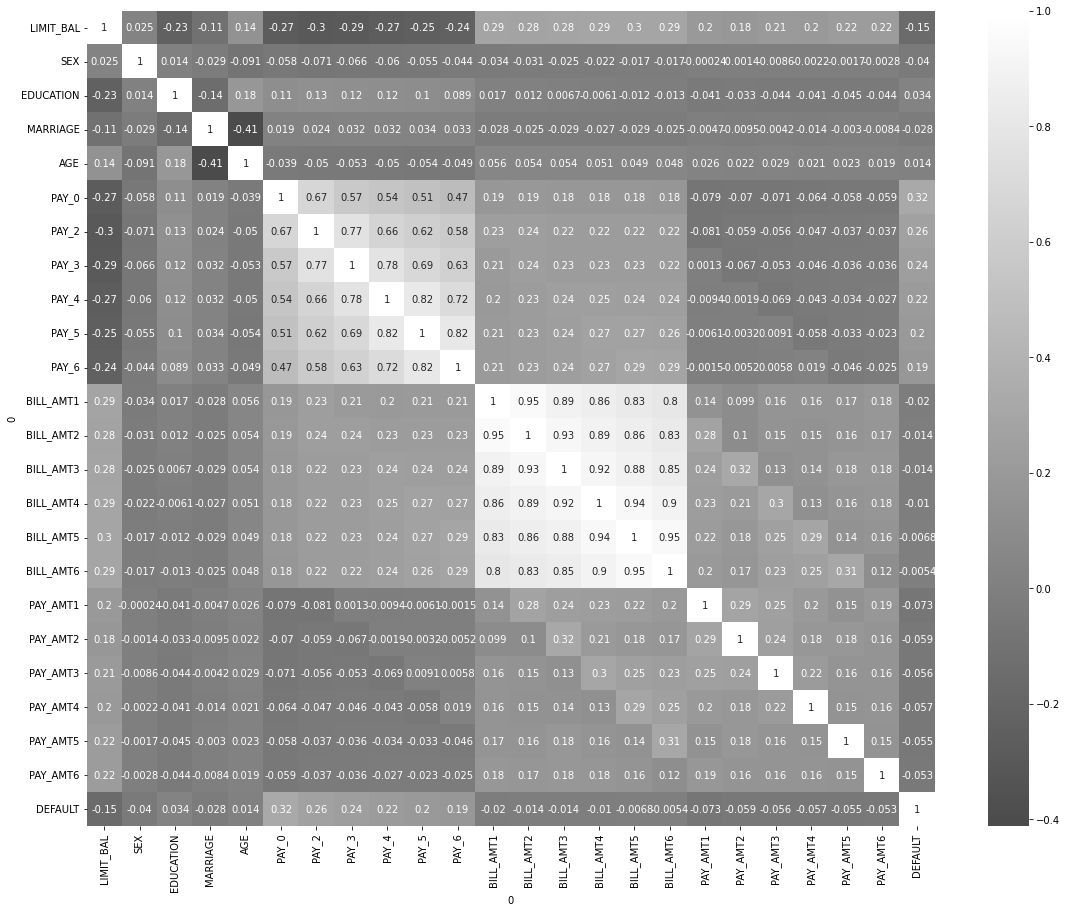

In [ ]:
plt.figure(figsize=(19,15))
sns.heatmap(df.corr(),annot=True,center = 0 , cmap ='gist_gray')
plt.show()

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
Y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,stratify=  Y, train_size = 0.8, random_state=42)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred= LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.7788333333333334
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV

In [ ]:
lr_model = grid(LR,
                param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2'],
'C' : [1.0, 0.1, 0.01]}, cv = 3 , verbose = 1)

In [ ]:
lr_model.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [ ]:
lr_model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lr_model = lr_model.best_estimator_

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8085
Precision: 0.6926406926406926
Recall: 0.24114544084400905


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, Y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.7788333333333334
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc_model = GridSearchCV(SVC(), param_grid= {'kernel':['poly', 'rbf'],'C':[1.0, 0.1, 0.01],'gamma':['scale', 'auto']}, cv= 2, verbose= 1)

In [ ]:
svc_model.fit(X_train, Y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [ ]:
svc_model.best_params_

In [ ]:
svc_model = svc_model.best_estimator_

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc = BaggingClassifier()

In [ ]:
bc.fit(X_train, Y_train)

BaggingClassifier()

In [ ]:
y_pred = bc.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8028333333333333
Precision: 0.5957446808510638
Recall: 0.33760361718161264


In [ ]:
bc_model = GridSearchCV(bc, param_grid= {'n_estimators':[45,50, 65]}, verbose = 1 , cv = 3)

In [ ]:
bc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [45, 50, 65]}, verbose=1)

In [ ]:
bc_model.best_params_

{'n_estimators': 65}

In [ ]:
bc_model = bc_model.best_estimator_

In [ ]:
bc_model.fit(X_train, Y_train)

BaggingClassifier(n_estimators=65)

In [ ]:
y_pred = bc_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.812
Precision: 0.6277278562259306
Recall: 0.36850037678975134


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8121666666666667
Precision: 0.6291989664082688
Recall: 0.36699321778447624


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
rfc_model = GridSearchCV(rfc, param_grid = dict(n_estimators = [10, 100, 1000],
max_features = ['sqrt', 'log2']), cv = 3, verbose= 1)

In [ ]:
rfc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

In [ ]:
rfc_model.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
rfc_model = rfc_model.best_estimator_

In [ ]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(max_features='sqrt')

In [ ]:
y_pred = rfc_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8106666666666666
Precision: 0.6241872561768531
Recall: 0.3617181612660136


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8185
Precision: 0.6657381615598886
Recall: 0.3602110022607385


In [ ]:
gbc_model = GridSearchCV(gbc, param_grid = dict(n_estimators = [10, 50],
learning_rate = [0.001, 0.01, 0.1],
subsample = [0.5, 0.7, 1.0],
max_depth = [3, 7, 9]) , cv= 3, verbose= 2)

In [ ]:
gbc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, subsample=0.5; total time=   1.9

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [ ]:
gbc_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}

In [ ]:
gbc_model = gbc_model.best_estimator_

In [ ]:
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=50, subsample=0.5)

In [ ]:
y_pred = gbc_model.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score( Y_test, y_pred))
print("Recall:",recall_score(Y_test ,y_pred))

Accuracy: 0.8186666666666667
Precision: 0.663923182441701
Recall: 0.36473247927656366


In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify = Y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
 gsearch1.best_score_

0.8215833333333333

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.827
The accuracy on test data is  0.8193333333333334


In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)


print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)


The accuracy on test data is  0.8193333333333334
The precision on test data is  0.36096458176337604
The recall on test data is  0.66993006993007
